# Relación entre la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia.
  ## Un análisis estadístico de datos abiertos disponibles.
* Autor: Jorge Israel Frómeta Moya
* Fecha: 17/12/2024

## Tabla de Contenido

- [Introducción](#Introducción)
- [Carga_y_Exploración_de_Datos](#Carga_y_Exploración_de_Datos)
- [Preparación_de_los_Datos](#Preparación_de_los_Datos)
- [Modelado_y_Resultados](#Modelado_y_Resultados)
- [Conclusiones](#Conclusiones)

## Introducción
La Generalitat Valenciana, a través de su Portal de Datos Abiertos, facilita a la ciudadanía el acceso libre y gratuito a los datos públicos en formato abierto que produce como resultado de las actividades que realiza en el ejercicio de sus competencias. A estos datos se pueden acceder mediante el link [https://portaldadesobertes.gva.es/es.](https://portaldadesobertes.gva.es/es)

Entre estos datos que pone a disposición del público se encuentran la clasificación de la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia. A primera vista la posible relación de estos elementos no se hace evidente, pero desde un punto de vista social, encontrar posibles patrones de relación puede favorecer una toma de decisiones que ayude a zonas vunerables económicamente a no ser más perjudicadas por aspectos como una menor disponibilidad de un servcio público como las bicicletas o el exceso de ruido.
Es por ello que este análisis tiene como objetivo investigar la relación entre la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia. Para ello se plantean una serie de interrogantes que guían el análisis:

* Existen diferencias significativas de la disponibilidad del servicio público de bicicletas entre las zonas de Valencia de acuerdo a su grado de vulnerabilidad económica?
  
* Existen diferencias significativas de los niveles de ruido entre las zonas de Valencia de acuerdo a su grado de vulnerabilidad económica? 

Se sigue el siguiente procedimiento.

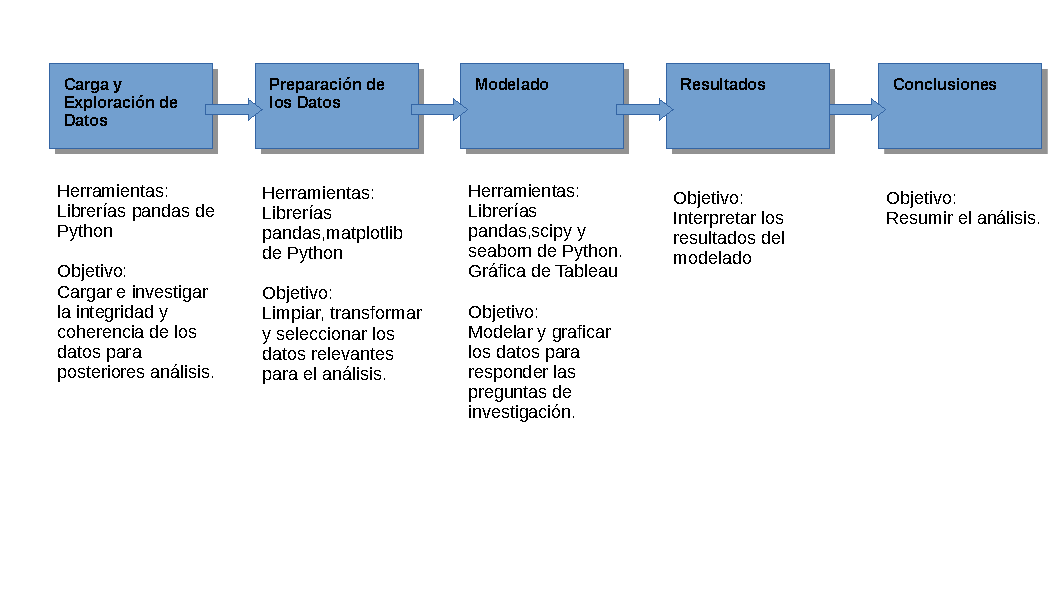

In [6]:
from IPython.display import Image
Image(filename='images/flowchart.png')

## Carga_y_Exploración_de_Datos

* Importar las librerías y archivos necesarios para el análisis.
* Exploración inicial de los conjuntos de datos.

In [15]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import ast
from shapely.geometry import Polygon,Point
import chardet
from src.funciones import *
import numpy as np
from scipy import stats
import seaborn as sns
from IPython.display import display, Markdown


In [16]:
# Lee el archivo en modo binario
with open("data/vulnerabilidad-por-barrios.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # Esto mostrará el encoding detectado

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [19]:
#Leyendo los datos de vulnerabilidad por barrios
#Cargando el archivo en el encoding corecto
df_vulnerability = geopandas.read_file("data/vulnerabilidad-por-barrios.csv",encoding='utf-8')

In [21]:
display(Markdown("### Datos de Vulnerabilidad (primeros 5 registros)"))
display(df_vulnerability.head())


### Datos de Vulnerabilidad (primeros 5 registros)

,latitud,longitud,Geo Shape,Nombre,Codbar,Distrito,Ind_Equip,Vul_Equip,Ind_Dem,Vul_Dem,Ind_Econom,Vul_Econom,Ind_Global,Vul_Global,Shape_Leng,Shape_Area
0,39.49519800920953,-0.37693208543042944,"{""coordinates"": [[[-0.371220903764217, 39.4983...",TORREFIEL,152,RASCANYA,4.2,Vulnerabilidad Baja,2.9,Vulnerabilidad Baja,1.9,Vulnerabilidad Media,3.0,Vulnerabilidad Baja,3801.81604777,700272.87745
1,39.48596999539278,-0.38299994871562,"{""coordinates"": [[[-0.385731584374701, 39.4894...",MARXALENES,51,LA SAÏDIA,2.4,Vulnerabilidad Baja,2.6,Vulnerabilidad Media,2.2,Vulnerabilidad Media,2.4,Vulnerabilidad Media,2854.60419306,390361725
2,39.48698061023942,-0.3903436440048376,"{""coordinates"": [[[-0.389470864324888, 39.4885...",EL CALVARI,43,CAMPANAR,1.2,Vulnerabilidad Alta,2.6,Vulnerabilidad Media,1.8,Vulnerabilidad Alta,1.9,Vulnerabilidad Alta,1498.59171213,93682.7325001
3,39.48174281864096,-0.363073281238664,"{""coordinates"": [[[-0.362286035196065, 39.4848...",JAUME ROIG,63,EL PLA DEL REAL,1.2,Vulnerabilidad Alta,2.4,Vulnerabilidad Alta,4.2,Vulnerabilidad Baja,2.6,Vulnerabilidad Baja,2167.18334854,190797.3847
4,39.47854970455085,-0.3586248160984583,"{""coordinates"": [[[-0.35950400852676, 39.48146...",CIUTAT UNIVERSITARIA,64,EL PLA DEL REAL,1.8,Vulnerabilidad Baja,3.1,Vulnerabilidad Baja,4.0,Vulnerabilidad Baja,3.0,Vulnerabilidad Baja,2800.42327864,276954.5078


In [23]:
#Leyendo los datos de disponibilidad de bicicletas 
df_disponibilidad_bici = geopandas.read_file('data/valenbisi-disponibilitat-valenbisi-dsiponibilidad.csv',encoding='utf-8')

In [25]:
display(Markdown("### Datos de Disponibilidad de bicicletas (primeros 5 registros)"))
display(df_disponibilidad_bici.head())

### Datos de Disponibilidad de bicicletas (primeros 5 registros)

,Direccion,Numero,Activo,Bicis_disponibles,Espacios_libres,Espacios_totales,ticket,fecha_actualizacion,geo_shape,latitud,longitud
0,Germanías - Ruzafa,33,T,8,12,20,T,03/09/2024 12:03:33,"{""coordinates"": [-0.37399038562310283, 39.4648...",39.46481830023885,-0.37399038562310283
1,Av Puerto 19 (Telefónica),63,T,2,18,20,T,03/09/2024 12:03:33,"{""coordinates"": [-0.358414330727018, 39.467779...",39.46777930285978,-0.358414330727018
2,Ribera - Plaza Ayuntamiento,15,T,13,4,34,T,03/09/2024 12:03:33,"{""coordinates"": [-0.3756373880434071, 39.46908...",39.46908831533384,-0.3756373880434071
3,Francia - Menorca,56,T,11,4,15,F,03/09/2024 12:03:33,"{""coordinates"": [-0.3444052893928658, 39.45842...",39.45842126509135,-0.3444052893928658
4,Hospital - Horno del Hospital,10,T,2,12,15,T,03/09/2024 12:03:33,"{""coordinates"": [-0.38261041097634013, 39.4708...",39.470816323984536,-0.38261041097634013


In [27]:
#Importando el conjunto de datos sobre el nivel de ruido en Valencia
df_ruido = geopandas.read_file('data/mapa-soroll-24h-mapa-ruido-24h.csv')

In [29]:
display(Markdown("### Datos de Niveles de ruido (primeros 5 registros)"))
display(df_ruido.head())

### Datos de Niveles de ruido (primeros 5 registros)

,Nivel,gid,latitud,longitud
0,2,15,39.49876263098719,-0.3876610998962941
1,2,16,39.52431138976168,-0.37245136952351227
2,3,18,39.43030654004151,-0.36865880529221473
3,3,20,39.451943046981334,-0.3527951971241042
4,3,23,39.475539033281386,-0.3666062962050727


## Preparación_de_los_Datos

* Limpieza de los datos, deshacerse de atributos que no contribuyen al análisis.
    
* Transformación de datos: Convertir el formato de geolocalización compatible con geopandas.
    
* Selección de características: Seleccionar y unir los atributos relevantes para el análisis.

In [32]:
#Procesando los datos de geolocalizacion de vulnerabilidad a tipo geometry(Polygon) propio de un objeto de geopandas
df_vulnerability['Geo Shape'] = process_geo_data(df=df_vulnerability,geo_column='Geo Shape')

In [34]:
#Extrayendo y convirtiendo las coordenadas de los datos de longitud y latitud en objetos tipo Point 
#para su posterior procesamiento en un objeto de geopandas
df_vulnerability['Lat y Long']= df_vulnerability[['latitud','longitud']].astype('float').values.tolist()

In [36]:
#Procesando los datos de geolocalizacion a tipo geometry(Point) propio de un objeto de geopandas
df_vulnerability['Lat y Long'] = process_geo_data(df=df_vulnerability,geo_column='Lat y Long',type='Point')

In [38]:
#Definiendo el dataframe como Geodataframe con la variable Geo Shape como la de geometria por defecto
df_vulnerability = geopandas.GeoDataFrame(df_vulnerability,geometry='Geo Shape')

In [40]:
#Convirtiendo al tipo de datos adecuado y eliminando atributos innecesarios
df_vulnerability['latitud'] = df_vulnerability['latitud'].astype('float')
df_vulnerability['longitud'] = df_vulnerability['longitud'].astype('float')
df_vulnerability['Ind_Equip'] = df_vulnerability['Ind_Equip'].astype('float')
df_vulnerability['Ind_Econom'] = df_vulnerability['Ind_Econom'].astype('float')
df_vulnerability['Ind_Dem'] = df_vulnerability['Ind_Dem'].astype('float')
df_vulnerability['Ind_Global'] = df_vulnerability['Ind_Global'].astype('float')
df_vulnerability['Shape_Leng'] = df_vulnerability['Shape_Leng'].astype('float')
df_vulnerability['Shape_Area'] = df_vulnerability['Shape_Area'].astype('float')
df_vulnerability.drop(['latitud','longitud','Codbar'],axis=1,inplace=True)

In [42]:
display(Markdown("### Datos de Vulnerabilidad procesados (primeros 5 registros)"))
display(df_vulnerability.head())

### Datos de Vulnerabilidad procesados (primeros 5 registros)

,Geo Shape,Nombre,Distrito,Ind_Equip,Vul_Equip,Ind_Dem,Vul_Dem,Ind_Econom,Vul_Econom,Ind_Global,Vul_Global,Shape_Leng,Shape_Area,Lat y Long
0,"POLYGON ((-0.37122 39.49839, -0.3718 39.49703,...",TORREFIEL,RASCANYA,4.2,Vulnerabilidad Baja,2.9,Vulnerabilidad Baja,1.9,Vulnerabilidad Media,3.0,Vulnerabilidad Baja,3801.816048,7.002729e+05,POINT (39.4952 -0.37693)
1,"POLYGON ((-0.38573 39.48943, -0.38554 39.48927...",MARXALENES,LA SAÏDIA,2.4,Vulnerabilidad Baja,2.6,Vulnerabilidad Media,2.2,Vulnerabilidad Media,2.4,Vulnerabilidad Media,2854.604193,3.903617e+08,POINT (39.48597 -0.383)
2,"POLYGON ((-0.38947 39.48856, -0.38755 39.48681...",EL CALVARI,CAMPANAR,1.2,Vulnerabilidad Alta,2.6,Vulnerabilidad Media,1.8,Vulnerabilidad Alta,1.9,Vulnerabilidad Alta,1498.591712,9.368273e+04,POINT (39.48698 -0.39034)
3,"POLYGON ((-0.36229 39.48483, -0.36274 39.48389...",JAUME ROIG,EL PLA DEL REAL,1.2,Vulnerabilidad Alta,2.4,Vulnerabilidad Alta,4.2,Vulnerabilidad Baja,2.6,Vulnerabilidad Baja,2167.183349,1.907974e+05,POINT (39.48174 -0.36307)
4,"POLYGON ((-0.3595 39.48146, -0.35948 39.48148,...",CIUTAT UNIVERSITARIA,EL PLA DEL REAL,1.8,Vulnerabilidad Baja,3.1,Vulnerabilidad Baja,4.0,Vulnerabilidad Baja,3.0,Vulnerabilidad Baja,2800.423279,2.769545e+05,POINT (39.47855 -0.35862)


In [44]:
#Procesando los datos sobre las coordenadas geograficas de disponibilidad de bicicletas
df_disponibilidad_bici['geo_shape'] = process_geo_data(df=df_disponibilidad_bici,geo_column='geo_shape',type='Point')

In [46]:
#Definiendo el dataframe como Geodataframe con la variable geo_shape como la de geometria por defecto
df_disponibilidad_bici = geopandas.GeoDataFrame(df_disponibilidad_bici,geometry='geo_shape')
#Convirtiendo al tipo de datos adecuado y eliminando atributos innecesarios
df_disponibilidad_bici['Bicis_disponibles'] = df_disponibilidad_bici['Bicis_disponibles'].astype('int')
df_disponibilidad_bici['Espacios_libres'] = df_disponibilidad_bici['Espacios_libres'].astype('int')
df_disponibilidad_bici['Espacios_totales'] = df_disponibilidad_bici['Espacios_totales'].astype('int')
df_disponibilidad_bici['fecha_actualizacion'] = pd.to_datetime(df_disponibilidad_bici['fecha_actualizacion'],format="%d/%m/%Y %H:%M:%S")
df_disponibilidad_bici.drop(['Numero','latitud','longitud','Activo','ticket'],axis=1,inplace=True)

In [48]:
display(Markdown("### Datos de Disponibilidad de bicicletas procesados (primeros 5 registros)"))
display(df_disponibilidad_bici.head())

### Datos de Disponibilidad de bicicletas procesados (primeros 5 registros)

,Direccion,Bicis_disponibles,Espacios_libres,Espacios_totales,fecha_actualizacion,geo_shape
0,Germanías - Ruzafa,8,12,20,2024-09-03 12:03:33,POINT (-0.37399 39.46482)
1,Av Puerto 19 (Telefónica),2,18,20,2024-09-03 12:03:33,POINT (-0.35841 39.46778)
2,Ribera - Plaza Ayuntamiento,13,4,34,2024-09-03 12:03:33,POINT (-0.37564 39.46909)
3,Francia - Menorca,11,4,15,2024-09-03 12:03:33,POINT (-0.34441 39.45842)
4,Hospital - Horno del Hospital,2,12,15,2024-09-03 12:03:33,POINT (-0.38261 39.47082)


In [50]:
#Ordenando las coordenadas de latitud y longitud de los datos de nivel de ruido para alinearlas con el resto de los datos
lat_long = df_ruido[['latitud','longitud']].astype('float').values.tolist()
ab_list = []
for i in lat_long:
    a,b = i[1],i[0]
    ab_list.append([a,b])
df_ruido['Lat y Long'] = ab_list
#Convirtiendo las coordenadas a objetos de tipo Point e insertando como GeoSeries
df_ruido['Lat y Long'] = process_geo_data(df=df_ruido,geo_column='Lat y Long',type='Point')

In [52]:
#Definiendo el dataframe como Geodataframe con la variable geo_shape como la de geometria por defecto
df_ruido = geopandas.GeoDataFrame(df_ruido,geometry='Lat y Long')
#Convirtiendo al tipo de datos adecuado y eliminando atributos inncesearios
df_ruido['Nivel'] = df_ruido['Nivel'].astype('int')
df_ruido.drop(['gid','latitud','longitud'],axis=1,inplace=True)

In [54]:
display(Markdown("### Datos de Niveles de ruido procesados (primeros 5 registros)"))
display(df_ruido.head())

### Datos de Niveles de ruido procesados (primeros 5 registros)

,Nivel,Lat y Long
0,2,POINT (-0.38766 39.49876)
1,2,POINT (-0.37245 39.52431)
2,3,POINT (-0.36866 39.43031)
3,3,POINT (-0.3528 39.45194)
4,3,POINT (-0.36661 39.47554)


Para el análisis se hace necesario poder ubicar los distintos puntos de disponibilidd de bicicletas y nivel de ruido dentro de los perímetros de los barrios de Valencia según sus coordenadas de longitud y latitud. Para ello se implementan los siguientes algoritmos.

In [57]:
#Procesando y geolocalizando por barrios los datos de disponibilidad de bicicletas
name_zones = []
ind_econom_list = []
vul_econom_list = []
#Se recorren todos los campos del conjunto de datos de la disponibilidad de bicicletas 
for i in range(len(df_disponibilidad_bici.index)):
    punto = df_disponibilidad_bici.geo_shape[i]
    list_size0 = len(name_zones)
    #Por cada barrio y de acuerdo la geolocalizacion de su perimetro se comprueba si pertenece o no al mismo,
    #en caso positivo se almacena el nombre del barrio, su indice de vulnerabilidad economica y su clasificacion
    for j in range(len(df_vulnerability.index)):
        poligono = df_vulnerability['Geo Shape'][j]    
        result = punto.within(poligono)
        if result:
            name_zones.append(df_vulnerability['Nombre'][j])
            ind_econom_list.append(df_vulnerability['Ind_Econom'][j])
            vul_econom_list.append(df_vulnerability['Vul_Econom'][j])
    #Se comprueba si la lista de zonas ha crecido, de no ser asi sigifica que no se le pudo asignar a algun punto 
    #su barrio correspondiente, por lo que se le etiqueta "Not found".
    list_size1 = len(name_zones)
    if list_size0 == list_size1:
        name_zones.append("Not found")
        ind_econom_list.append("Not found")
        vul_econom_list.append("Not found")

In [59]:
#Se incorporan los datos 
df_disponibilidad_bici['Name_Zone'] = name_zones
df_disponibilidad_bici['Ind_Econom'] = ind_econom_list
df_disponibilidad_bici['Vul_Econom'] = vul_econom_list
#Por ultimo se eliminan los elementos que no se le pudieron asignar barrios
df_disponibilidad_bici.drop(df_disponibilidad_bici[df_disponibilidad_bici['Name_Zone']=='Not found'].index,inplace=True)


In [61]:
#Se repite el mismo procedimiento para el conjunto de datos del nivel de ruido
name_zones = []
ind_econom_list = []
vul_econom_list = []
for i in range(len(df_ruido.index)):
    punto = df_ruido['Lat y Long'][i]
    list_size0 = len(name_zones)
    for j in range(len(df_vulnerability.index)):
        poligono = df_vulnerability['Geo Shape'][j]    
        result = punto.within(poligono)
        if result:
            name_zones.append(df_vulnerability['Nombre'][j])
            ind_econom_list.append(df_vulnerability['Ind_Econom'][j])
            vul_econom_list.append(df_vulnerability['Vul_Econom'][j])
            
    list_size1 = len(name_zones)
    if list_size0 == list_size1:
        name_zones.append("Not found")
        ind_econom_list.append("Not found")
        vul_econom_list.append("Not found")


In [63]:
df_ruido['Name_Zone'] = name_zones
df_ruido['Ind_Econom'] = ind_econom_list
df_ruido['Vul_Econom'] = vul_econom_list
df_ruido.drop(df_ruido[df_ruido['Name_Zone']=='Not found'].index,inplace=True)

In [65]:
#Definiendo los valores promedios de los indicadores sobre la disponibilidad de bicicletas agrupados por barrios
df_bici_zones = df_disponibilidad_bici[['Name_Zone',  'Bicis_disponibles', 'Espacios_libres',
       'Espacios_totales','Ind_Econom']].groupby('Name_Zone').mean().reset_index()

In [67]:
#Adicionando los datos de las coordenadas de los barrios
coordenadas_lista = []
for i in df_bici_zones['Name_Zone']:
    len_list0 = len(coordenadas_lista)
    for j,k in enumerate(df_vulnerability.Nombre):
        if i == k:
            coordenadas_lista.append(df_vulnerability['Geo Shape'][j])
        else:
            pass
    len_list1 = len(coordenadas_lista)
    if len_list0 == len_list1:
        coordenadas_lista.append(np.nan)
df_bici_zones['Poly_shape'] = geopandas.GeoSeries(coordenadas_lista)
df_bici_zones = geopandas.GeoDataFrame(df_bici_zones,geometry='Poly_shape')

In [69]:
display(Markdown("### Datos de promedios de disponibilidad de bicis por barrio (primeros 5 registros)"))
display(df_bici_zones.head())

### Datos de promedios de disponibilidad de bicis por barrio (primeros 5 registros)

,Name_Zone,Bicis_disponibles,Espacios_libres,Espacios_totales,Ind_Econom,Poly_shape
0,AIORA,5.285714,15.000000,20.571429,2.1,"POLYGON ((-0.34836 39.46966, -0.34704 39.46928..."
1,ALBORS,4.250000,13.750000,20.000000,2.9,"POLYGON ((-0.35442 39.47146, -0.35441 39.47148..."
2,ARRANCAPINS,3.222222,17.555556,21.111111,3.4,"POLYGON ((-0.38593 39.47195, -0.38541 39.47123..."
3,BENICALAP,6.181818,11.909091,18.090909,2.5,"POLYGON ((-0.38139 39.49868, -0.3812 39.49693,..."
4,BENIMACLET,8.800000,8.800000,17.800000,3.0,"POLYGON ((-0.36586 39.48831, -0.36399 39.48683..."


## Modelado_y_Resultados
Para modelar los datos de manera que responda al objetivo del análisis y dé respuestas a las preguntas de investigación se recurre primeramente a la visualización de los datos. A continuacion se muestran visualizaciones de la geolocalización de los datos de interés.

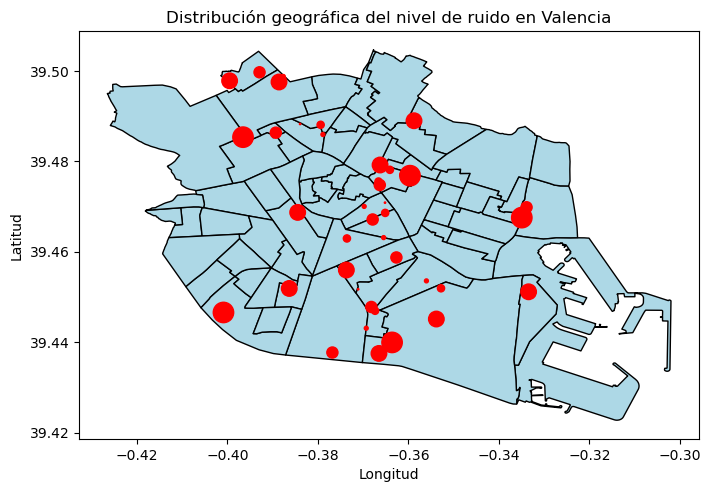

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))
df_vulnerability.plot(ax=ax, color='lightblue', edgecolor='black')
df_ruido.plot(ax=ax, color='red', markersize=df_ruido.Nivel**3,legend=True)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica del nivel de ruido en Valencia')
fig.savefig("images/Nivel_ruido_geolocal.png")

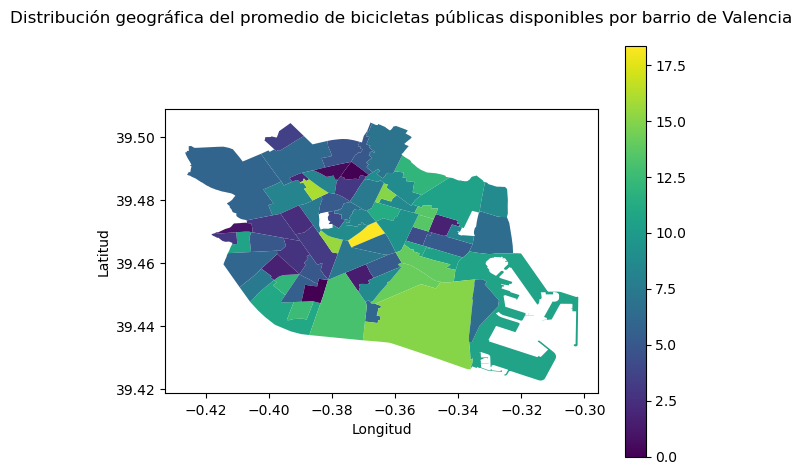

In [74]:
ax = df_bici_zones.plot(column='Bicis_disponibles',legend=True)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.suptitle('Distribución geográfica del promedio de bicicletas públicas disponibles por barrio de Valencia')
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/Media_disp_bicis_geolocal.png")

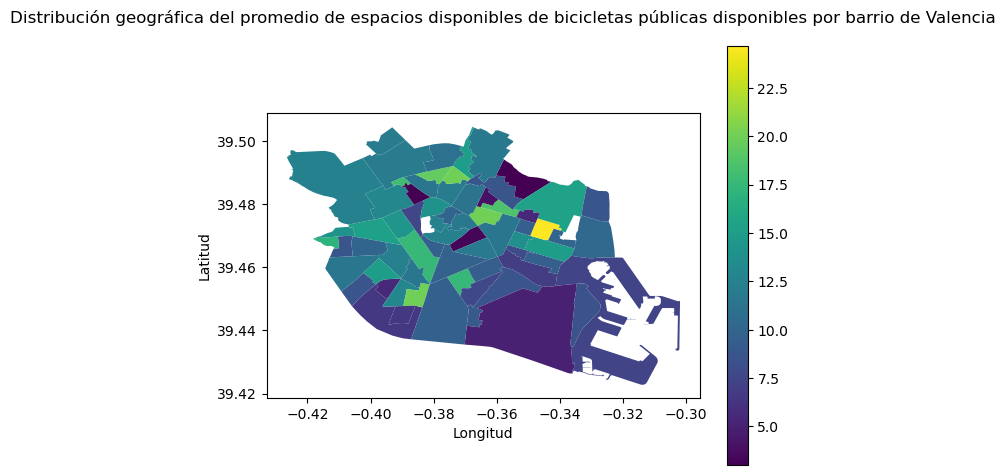

In [76]:
ax = df_bici_zones.plot(column='Espacios_libres',legend=True)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.suptitle('Distribución geográfica del promedio de espacios disponibles de bicicletas públicas disponibles por barrio de Valencia')
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/Media_espacio_libres_bicis_geolocal.png")

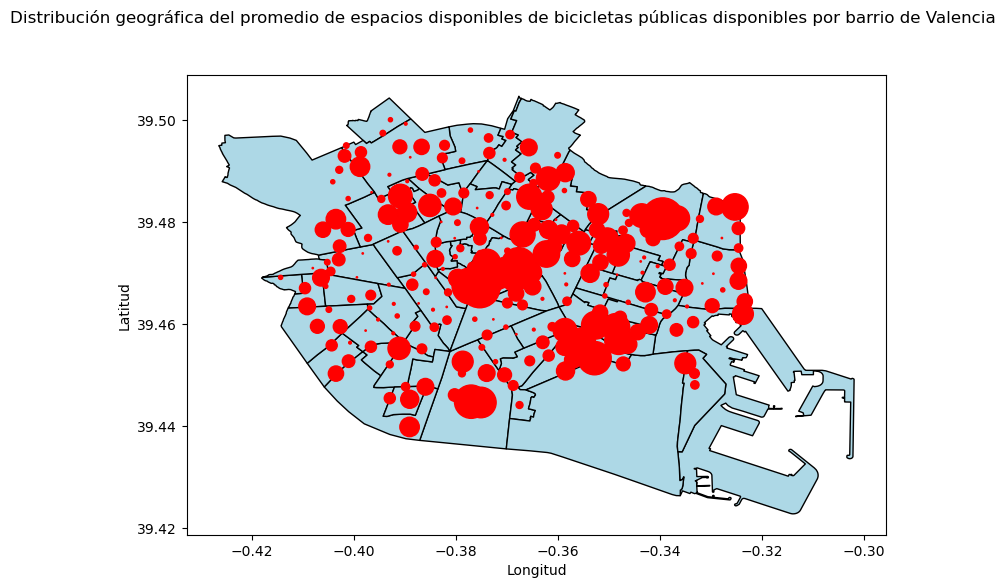

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))
df_vulnerability.plot(ax=ax, color='lightblue', edgecolor='black',legend=True)
df_disponibilidad_bici.plot(ax=ax, color='red', markersize=df_disponibilidad_bici['Bicis_disponibles']**2)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.suptitle('Distribución geográfica del promedio de espacios disponibles de bicicletas públicas disponibles por barrio de Valencia')
plt.tight_layout()
fig.savefig("images/Promedio_disponibilidad_bici_geolocal.png")

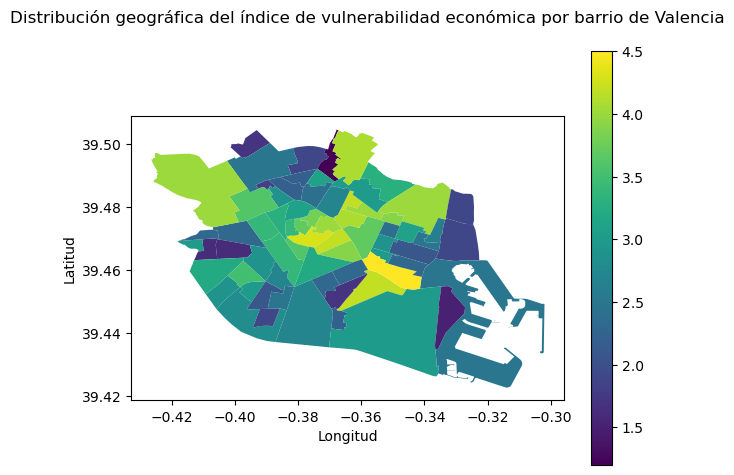

In [80]:
ax = df_vulnerability.plot(column='Ind_Econom',legend=True)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.suptitle('Distribución geográfica del índice de vulnerabilidad económica por barrio de Valencia')
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("images/Ind_vuln_econom_geolocal.png")

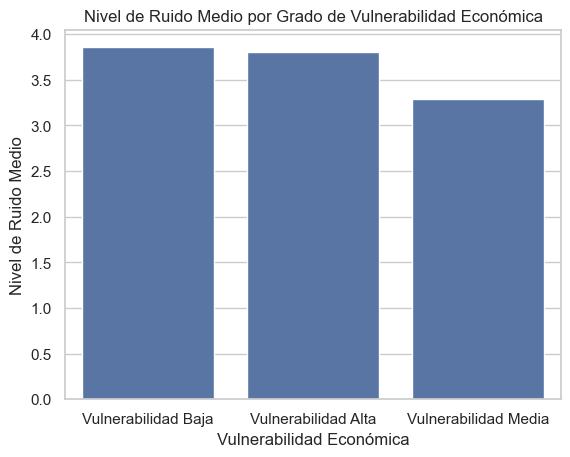

In [82]:
sns.set(style="whitegrid")
ax = sns.barplot(data=df_ruido, x='Vul_Econom', y='Nivel', errorbar=None)
ax.set_title('Nivel de Ruido Medio por Grado de Vulnerabilidad Económica')
ax.set_xlabel('Vulnerabilidad Económica')
ax.set_ylabel('Nivel de Ruido Medio')
plt.show()
fig = ax.get_figure()
fig.savefig("images/Nivel_ruido_medio por Vuln_econom.png")

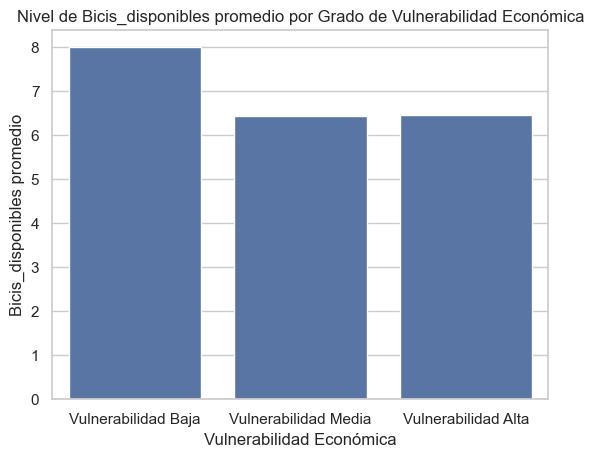

In [84]:
ax = sns.barplot(data=df_disponibilidad_bici, x='Vul_Econom', y='Bicis_disponibles', errorbar=None)
ax.set_title('Nivel de Bicis_disponibles promedio por Grado de Vulnerabilidad Económica')
ax.set_xlabel('Vulnerabilidad Económica')
ax.set_ylabel('Bicis_disponibles promedio')
plt.show()
fig = ax.get_figure()
fig.savefig("images/Cicis_disponible_promedio_por_Vuln_econom.png.png")

In [86]:
ruido_grupo_vulnerabilidad = [df_ruido[df_ruido['Vul_Econom'] == group]['Nivel'] for group in df_ruido['Vul_Econom'].unique()]
F_ruido,p_value_ruido = stats.f_oneway(ruido_grupo_vulnerabilidad[0],ruido_grupo_vulnerabilidad[1],ruido_grupo_vulnerabilidad[2])

bicisDisponibles_grupo_vulnerabilidad = [df_disponibilidad_bici[df_disponibilidad_bici['Vul_Econom'] == group]['Bicis_disponibles'] for group in df_disponibilidad_bici['Vul_Econom'].unique()]
F_bici_disp,p_value_bici_disp = stats.f_oneway(bicisDisponibles_grupo_vulnerabilidad[0],bicisDisponibles_grupo_vulnerabilidad[1],bicisDisponibles_grupo_vulnerabilidad[2])

result = {'F_valor': [F_ruido,F_bici_disp],'p_valor':[p_value_ruido,p_value_bici_disp]}
df_result = pd.DataFrame(result,index=['Nivel de ruido promedio','Disponibilidad promedio de bicis'])



In [88]:
display(Markdown("### Resultados del Análisis de Variancia para la diferencias de medias de los niveles de ruido y las bicicletas disponibles de acuerdo al grado de vulnerabildad económica"))
display(df_result)

### Resultados del Análisis de Variancia para la diferencias de medias de los niveles de ruido y las bicicletas disponibles de acuerdo al grado de vulnerabildad económica

,F_valor,p_valor
Nivel de ruido promedio,0.388934,0.680517
Disponibilidad promedio de bicis,1.487936,0.227698


## Conclusiones

LLegado a este punto se puede concluir que:

1. El análisis visual no revela un patrón significativo de diferenciación en cuanto al nivel de ruido medio y la disponibilidad media de bicicletas del servicio público entre las zonas de Valencia, agrupadas por su grado de vulnerabilidad económica.
2. El análisis estadístico mediante la técnica ANOVA respalda esta apreciación visual, no siendo significativas la diferencias de medias entre estos indicadores ni siquiera para un 80% de nivel de confianza.

Limitaciones:
* El estudio presentado no tiene en cuenta la potencia estadística de las pruebas de hipótesis realizadas, tampoco se corroboran los supuestos de la utilización de la prueba ANOVA como la normalidad de las variables o la homocedasticidad.
* El análisis se realiza sobre variables muestrales fuertemente desbalanceadas, debido a la predominancia de la clasificación de baja vulnerabilidad en las distintas zonas de Valencia tal como se muestra en el siguiente gráfico.
* Por todo ello los resultados deben ser tomados con cautela en cuantu a su fiabilidad estadística.